In [2]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
from io import BytesIO
from PIL import Image

In [3]:
ROOT_PATH = "../../../desarrollo/"

DATASET_FOLDER = ROOT_PATH + "Data/Dataset/Audios/"

/tmp/ipykernel_1150425/1161370500.py:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


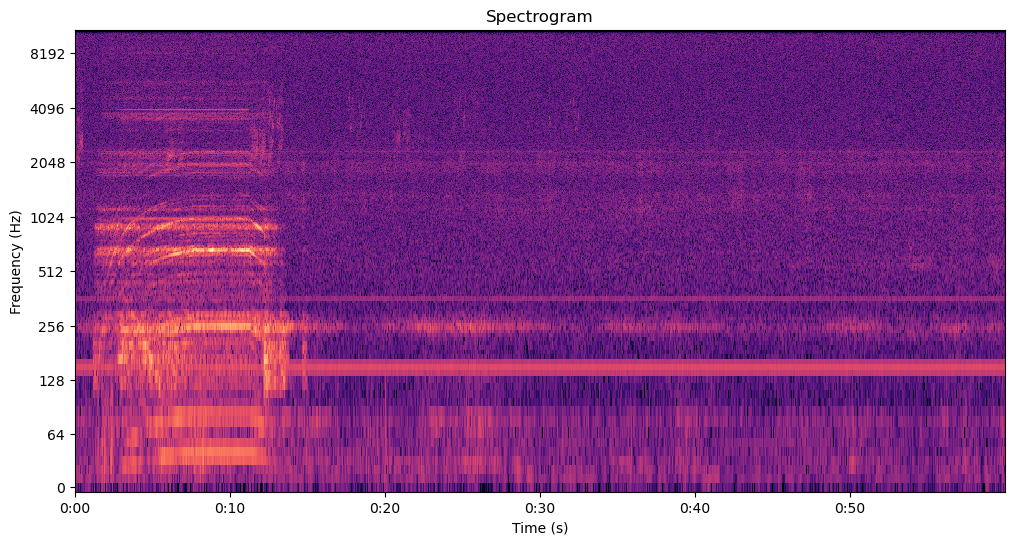

In [4]:
# Define the path to the audio file you want to process
audio_file = DATASET_FOLDER + "AM1/2023_05_10/AM1_20230510_060000.WAV"
# Load the audio
y, sr = librosa.load(audio_file)

# Create the spectrogram without axis scales and color bar
# Define the frequency range
fmin = 1  # Minimum frequency (0 Hz)
fmax = 16000  # Maximum frequency (32000 Hz)

# Create the spectrogram without axis scales and color bar
plt.figure(figsize=(12, 6))  # Set the background color to black
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", fmin=fmin, fmax=fmax)  # Specify frequency range

# Set it in grayscale
# plt.set_cmap('gray')

# Remove axis labels and color bar
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
#plt.axis('off')

# Save the figure without a frame or border
plt.savefig('spectrogram.jpg', bbox_inches='tight', pad_inches=0, format='jpg')

plt.show()

/tmp/ipykernel_1149324/3687363914.py:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


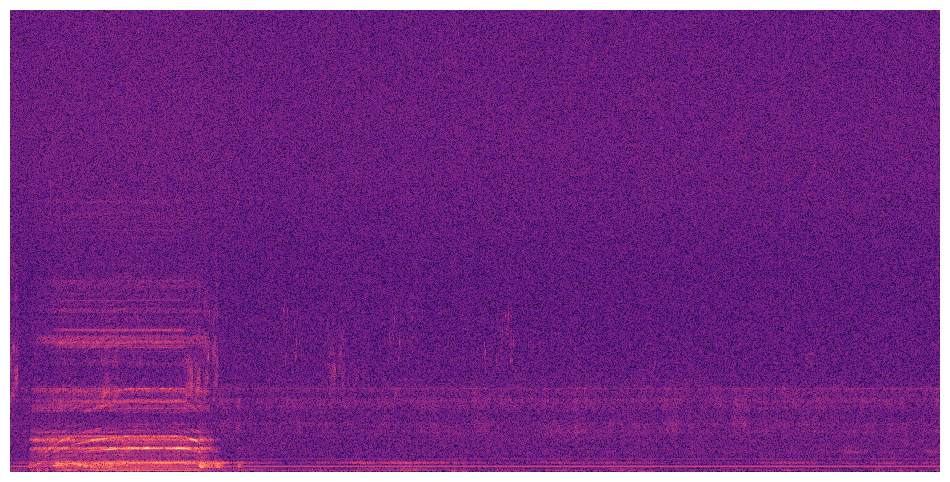

In [4]:
y, sr = librosa.load(audio_file, sr=None)

# Define the frequency range
fmin = 1  # Minimum frequency (0 Hz)
fmax = 16000  # Maximum frequency (32000 Hz)

fig, ax = plt.subplots(figsize=(12, 6))  # Set the background color to black
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="mel", fmin=fmin, fmax=fmax, ax=ax)  # Specify frequency range
ax.axis('off')  # Remove axes

# Convert the plot to an image object
buf = BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, transparent=True)
fig.savefig("spectrogram.png", bbox_inches='tight', pad_inches=0, transparent=True)
buf.seek(0)
mel_spectrogram_image = Image.open(buf)

In [12]:
def create_spectrogram(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    
    # Create the output path for the image
    output_image_path = audio_file.replace('Audios', 'Images').replace(".WAV", ".PNG")
    
    # Ensure the output folder exists
    os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
    
    # Define the frequency range
    fmin = 1  # Minimum frequency (0 Hz)
    fmax = 16000  # Maximum frequency (32000 Hz)

    fig, ax = plt.subplots(figsize=(12, 6))  # Set the background color to black
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", fmin=fmin, fmax=fmax, ax=ax)  # Specify frequency range
    ax.axis('off')  # Remove axes

    # Save the figure using the output_image_path
    fig.savefig(output_image_path, bbox_inches='tight', pad_inches=0, transparent=True)
    
    # Close the figure to release memory resources
    plt.close(fig)

# Recursively iterate through all subdirectories and audio files
for root, _, files in os.walk(DATASET_FOLDER):
    for file in files:
        if file.endswith('.WAV'):
            audio_file = os.path.join(root, file)
            output_image_path = audio_file.replace('Audios', 'Images').replace(".WAV", ".PNG")
            if not os.path.exists(output_image_path): # Skip if the image already exists
                create_spectrogram(audio_file)

/tmp/ipykernel_1150425/2578093319.py:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


In [13]:
# Count number of .WAV files in Dataset Folder and Count number of .PNG files in Images Folder
audio_files = sum([len(files) for _, _, files in os.walk(DATASET_FOLDER)])
image_files = sum([len(files) for _, _, files in os.walk(DATASET_FOLDER.replace('Audios', 'Images'))])

print(f"Number of audio files: {audio_files}")
print(f"Number of image files: {image_files}")

Number of audio files: 471
Number of image files: 471


In [11]:
'''# Divide DATASET_FOLDER content in BATCH_NUMBER of batches
BATCH_NUMBER = 0
audio_files = []
for root, dirs, files in os.walk(DATASET_FOLDER):
    for file in files:
        if file.endswith('.WAV'):
            audio_files.append(os.path.join(root, file))
        
# Create the spectrogram images, do first one batch, print batch X done and continue with the next
for i in range(7, BATCH_NUMBER):
    print(f"Batch {i+1} of {BATCH_NUMBER}")
    for audio_file in tqdm(audio_files[i::BATCH_NUMBER]):
        create_spectrogram(audio_file)
    print(f"Batch {i+1} done")

print("All batches done")'''

'# Divide DATASET_FOLDER content in BATCH_NUMBER of batches\nBATCH_NUMBER = 0\naudio_files = []\nfor root, dirs, files in os.walk(DATASET_FOLDER):\n    for file in files:\n        if file.endswith(\'.WAV\'):\n            audio_files.append(os.path.join(root, file))\n        \n# Create the spectrogram images, do first one batch, print batch X done and continue with the next\nfor i in range(7, BATCH_NUMBER):\n    print(f"Batch {i+1} of {BATCH_NUMBER}")\n    for audio_file in tqdm(audio_files[i::BATCH_NUMBER]):\n        create_spectrogram(audio_file)\n    print(f"Batch {i+1} done")\n\nprint("All batches done")'